# Simple Unsupervised Learning

Unsupervised learning is a type of algorithm that seeks to classify unlabled data. Gaussian clouds will be created to represent the data. Scikit-Learn's k-means clustering model will be used to classify the data. In a real-life situation there is no comparison metric in which to evaluate the model's performance. Since the data is being generated, however, model evaluation is possible!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [191]:
Nclass = 500

In [192]:
x1 = np.random.randn(Nclass, 2) + np.array([0,-2])
x2 = np.random.randn(Nclass, 2) + np.array([2,2])
x3 = np.random.randn(Nclass, 2) + np.array([-2,2])

X = np.vstack([x1,x2,x3])

In [193]:
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

In [194]:
X.shape

(1500, 2)

In [195]:
X[0]

array([-0.05963381, -1.43769206])

In [196]:
x1label = np.array([["one"] for i in range(500)])

In [197]:
x2label = np.array([["two"] for i in range(500)])

In [198]:
x3label = np.array([["three"] for i in range(500)])

In [199]:
xLabels = np.vstack([x1label,x2label,x3label])

In [200]:
xLabels.shape

(1500, 1)

In [201]:
import pandas as pd

In [202]:
df = pd.DataFrame(X)

In [203]:
df.head()

,0,1
0,-0.059634,-1.437692
1,-0.956690,-0.942218
2,0.362897,-1.888672
3,-0.277361,-1.430404
4,0.926849,-1.658699


In [204]:
df.columns = ["x","y"]

In [205]:
df.head()

,x,y
0,-0.059634,-1.437692
1,-0.956690,-0.942218
2,0.362897,-1.888672
3,-0.277361,-1.430404
4,0.926849,-1.658699


In [206]:
df["target"]=xLabels

In [207]:
df.head()

,x,y,target
0,-0.059634,-1.437692,one
1,-0.956690,-0.942218,one
2,0.362897,-1.888672,one
3,-0.277361,-1.430404,one
4,0.926849,-1.658699,one


In [208]:
from sklearn.utils import shuffle
df = shuffle(df)

df.head()

,x,y,target
385,0.833023,-2.760038,one
1470,-1.094966,1.646274,three
276,-1.931343,-1.953142,one
678,2.150657,2.228576,two
283,-0.043340,-2.537960,one


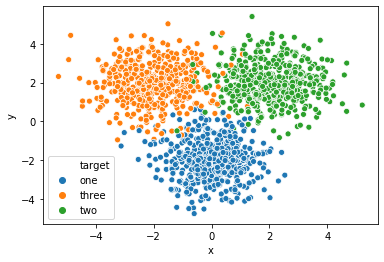

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.scatterplot(data=df,x="x",y="y",hue="target")

In [210]:
from sklearn.cluster import KMeans

In [211]:
# n_cluster wouldn't actually be known in a real life situation,
kmeans = KMeans(n_clusters=3)

In [212]:
kmeans.fit(df[["x","y"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [213]:
kmeans.labels_

array([1, 0, 1, ..., 1, 2, 0])

In [214]:
len(kmeans.labels_)

1500

In [215]:
df["predictions"]=kmeans.labels_

In [216]:
df.head()

,x,y,target,predictions
385,0.833023,-2.760038,one,1
1470,-1.094966,1.646274,three,0
276,-1.931343,-1.953142,one,1
678,2.150657,2.228576,two,2
283,-0.043340,-2.537960,one,1


In [217]:
df.head(10)

,x,y,target,predictions
385,0.833023,-2.760038,one,1
1470,-1.094966,1.646274,three,0
276,-1.931343,-1.953142,one,1
678,2.150657,2.228576,two,2
283,-0.043340,-2.537960,one,1
57,0.286005,-3.276465,one,1
682,2.121118,2.327099,two,2
1072,-1.893642,1.479293,three,0
1369,-3.528470,2.194918,three,0
1180,-2.524892,2.076909,three,0


In [218]:
# we are making assumptions here because the algorithm
# doesn't know which label to assign clusters

# we will assume two == 2
    # and one==1
    # and three==0
    
# accuracy report
def someTranslate(value):
    if value=="two":
        return 2
    elif value=="three":
        return 0
    else:
        return 1
    
df["target"]= df["target"].apply(someTranslate)



In [223]:
df.head()

,x,y,target,predictions
385,0.833023,-2.760038,1,1
1470,-1.094966,1.646274,0,0
276,-1.931343,-1.953142,1,1
678,2.150657,2.228576,2,2
283,-0.043340,-2.537960,1,1


In [220]:
correct = 0

for i in range(1500):
    if df["predictions"][i]==df["target"][i]:
        correct += 1
        
print(correct/1500)

0.9686666666666667


... interesting

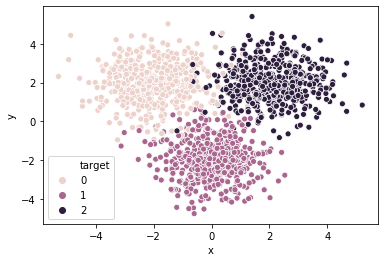

In [221]:
sns.scatterplot(data=df,x="x",y="y",hue="target")

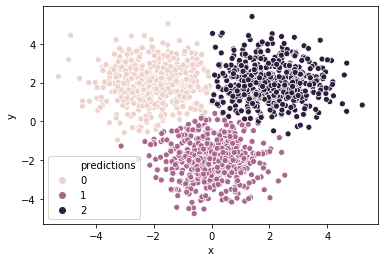

In [222]:
sns.scatterplot(data=df,x="x",y="y",hue="predictions")


## Conclusion

The two graphs above demonstrate that our predictions are are accurate because the coloring of the two clusterings are similar (One plot's the true data while the other graph represents the model's predictions). The accuracy is an indicator that our label assumptions from the result of `kmeans.labels_` are correct. This notebook demonstrates the feasibility of this modeling technique, and as an added benefit, it is scalable!